In [1]:
PATH_TO_GAPSE = "../";

In [2]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [3]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, Printf
using TwoFAST, LaTeXStrings, ProgressMeter

In [4]:
FILE_F_MAP = PATH_TO_GAPSE * "test/datatest/F_REFERENCE.txt"
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt"
FILE_BACKGROUND = PATH_TO_GAPSE * "test/datatest/WideA_ZA_background.dat"

z_min, z_max, θ_max = 0.05, 0.20, π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
    Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70, s_lim=1e-2,
    IPS_opts = Dict(
        :fit_left_min => 1e-6, :fit_left_max => 3e-6,
        :fit_right_min => 1e1, :fit_right_max => 2e1),
    IPSTools_opts = Dict(
        :N => 1024, :fit_min => 0.05, :fit_max => 0.5, 
        :con => true, :k_min => 1e-8, :k_max => 10.0),
)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP);

GaPSE.parameters_used(stdout, cosmo)

###############
#    GaPSE    #
############### 
#
# The Cosmology considered had the following paremeters:
# 
# - Matter Power Spectrum input file: "../test/datatest/file_pk.txt"
# - F window function input file: "../test/datatest/F_REFERENCE.txt"
# - Background data input file: "../test/datatest/WideA_ZA_background.dat"
#
# - Basic CosmoParams considered: 
#	 z_min = 0.05 	 z_max = 0.2
#	 θ_max = 1.5707963267948966 [rad] 	 h_0 = 0.7
#	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
#
# - CosmoParams about the Input Power Spectrum: 
#	 fit_left_min = 1.0e-6 	 fit_right_min = 10.0 	 
#	 fit_left_max = 3.0e-6 	 fit_right_max = 20.0 	 
#
# - CosmoParams about the Input Power Spectrum Tools: 
#	 k_max = 10.0 	 N = 1024 	 fit_max = 0.5 	 
#	 con = true 	 k_min = 1.0e-8 	 fit_min = 0.05 	 
#
# - Computed quantities: 
# 	 effective redshift z_eff = 0.15045636096023224 
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747

In [5]:
effect = "auto_doppler";
L = 0; 

In [6]:
GaPSE.print_map_ξ_multipole(
    cosmo, "PSM_files/xi_"*effect*"_L$L"*".txt", 
    effect,10 .^ range(0, 3, length= 300); 
    use_windows = false, N_log=1000, N_μs = 30, pr=true, L=L)

auto_doppler, L=0: 100%|████████████████████████████████| Time: 0:00:01



time needed for map_integral_on_mu for auto_doppler [in s] = 1.51060 


In [7]:
GaPSE.print_PS_multipole("PSM_files/xi_"*effect*"_L$L"*".txt",
    "PSM_files/ps_"*effect*"_L$L"*".txt";
     L = L, N = 100, pr = true, int_s_min=1e-1, int_s_max=1e3)


I'm computiong the PS_multipole from the file PSM_files/xi_auto_doppler_L0.txt

time needed for Power Spectrum  computation [in s] = 0.25849390029907227


time needed for Power Spectrum  computation [in s] = 0.3037898540496826



In [8]:
my_table = readdlm("PSM_files/ps_"*effect*"_L$L"*".txt", comments=true);
my_ks = convert(Vector{Float64}, my_table[:,1]);
my_pks = convert(Vector{Float64}, my_table[:,2]);

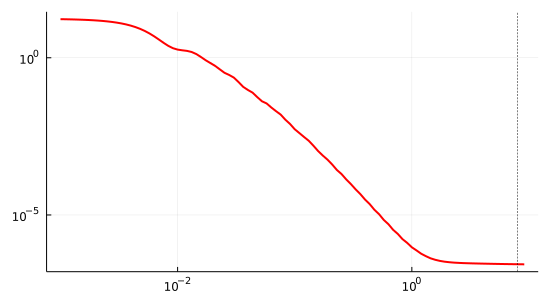

In [9]:
my_xs = my_ks
my_ys = my_pks

S_VLIM = 8
S_VLIM_F = @sprintf("%.2f", S_VLIM)

P = plot(
    my_xs[my_ys .> 0], my_ys[my_ys .> 0], 
    xaxis=:log, 
    yaxis=:log, 
    lw=2, lc=:red, ls=:solid, 
    size=(550, 300),
    #label="My PS", 
    #legend=:bottomleft,
    legend=false,
)

vline!(P, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, 
    lw=0.5, ls=:dash)

#savefig(P, "PS_AutoDoppler_L0.pdf")
#display(P)